In [31]:
###############################################################################
# Date:        Oct. 15 th 2019
# Name:      Peiying Lyu 
#ID:              8109407016
# Course:    INF 552, HW3
#
################################################################################
import os
import pandas as pd
import glob
import re
import sklearn
import warnings
warnings.filterwarnings('ignore')

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    Python Natural Sort (Alphanumeric Sort) 
    http://nedbatchelder.com/blog/200712/human_sorting.html
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

'''
cleaning data by using Excel:
with extra ',':

hw/Homework 3 Data/AReM/cycling/dataset9.csv
hw/Homework 3 Data/AReM/cycling/dataset14.csv
with ' ' instead of ',':

hw/Homework 3 Data/AReM/bending2/dataset4.csv
with 479 rows lose row time=13500:

hw/Homework 3 Data/AReM/sitting/dataset8.csv
'''
################################################################################
# b.  Keep datasets into train_data and test_data
################################################################################
mypath = 'D:/552 Machine Learning for Data Science/homework/Homework3/AReM/'
headers = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']   
data_instances = {'bending1': [], 'cycling': [], 'sitting': [], 'bending2': [], 'lying': [], 'standing': [], 'walking': []}

for k in data_instances:
    tmp_path = mypath + k +'/*.csv'
    files = glob.glob(tmp_path)
    for f in sorted(files, key=natural_keys):
        tmp_instances = pd.read_csv(f,skiprows=4)
        tmp_instances.columns = headers
        data_instances[k].append(tmp_instances)
print('full data instances')
print(data_instances)

sep_data = {'bending1': 2, 'cycling': 3, 'sitting': 3, 'bending2': 2, 'lying': 3, 'standing': 3, 'walking': 3}
test_data={}
train_data={}
for k in sep_data:
    test_data[k]=data_instances[k][:sep_data[k]]
    train_data[k]=data_instances[k][sep_data[k]:]
    
#=========================================================   
# def loading_single(dirname, file_num):
#     path = 'D:/552 Machine Learning for Data Science/homework/Homework3/AReM/'
#     path = path + dirname + '/dataset' + str(file_num) + '.csv'
#     df = pd.read_csv(path, skiprows=5, header=None)
#     df.columns = names
#     return df
#
# def loading_multi(dirname,num,num_end):
#     df_set = pd.DataFrame()
#     if num_end != 1:
#         dirname_1 = dirname
#         for i in range(num,num_end+1,1):
# #             print(i)
#             df = pd.DataFrame()
#             df = loading_single(dirname_1, i)
#             df_set= df_set.append(df,ignore_index = True)
#         df.columns = names
#     else:
#         df_set= loading_single(dirname,num)
#     return df_set

full data instances
{'bending1': [       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      39.25       0.43      22.75       0.43      33.75       1.30
1       250      39.25       0.43      23.00       0.00      33.00       0.00
2       500      39.25       0.43      23.25       0.43      33.00       0.00
3       750      39.50       0.50      23.00       0.71      33.00       0.00
4      1000      39.50       0.50      24.00       0.00      33.00       0.00
5      1250      39.25       0.43      24.00       0.00      33.00       0.00
6      1500      39.25       0.43      24.00       0.00      33.00       0.00
7      1750      39.00       0.00      23.75       0.43      33.00       0.00
8      2000      39.50       0.50      24.00       0.00      33.00       0.00
9      2250      39.50       0.50      23.00       0.00      33.00       0.00
10     2500      39.50       0.50      23.25       0.43      33.00       0.00
11     2750      39.50       0

In [11]:
print('train_data instances:')
train_data

train_data instances:


{'bending1': [       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
  0         0      42.00       0.71      21.25       0.43      30.00       0.00
  1       250      41.50       0.50      20.25       1.48      31.25       1.09
  2       500      41.50       0.50      14.25       1.92      33.00       0.00
  3       750      40.75       0.83      15.75       0.43      33.00       0.00
  4      1000      40.00       0.71      20.00       2.74      32.75       0.43
  5      1250      41.25       0.83      24.25       0.43      31.50       0.87
  6      1500      42.25       0.43      23.75       0.43      35.25       1.30
  7      1750      43.50       0.87      21.00       0.00      36.00       0.00
  8      2000      42.75       0.83      21.25       0.43      36.00       0.00
  9      2250      43.25       0.43      23.75       0.43      36.00       0.00
  10     2500      43.25       0.83      24.50       0.50      36.00       0.00
  11     2750      43.75    

In [12]:
print('test_data instances')
print(test_data)

test_data instances
{'bending1': [       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      39.25       0.43      22.75       0.43      33.75       1.30
1       250      39.25       0.43      23.00       0.00      33.00       0.00
2       500      39.25       0.43      23.25       0.43      33.00       0.00
3       750      39.50       0.50      23.00       0.71      33.00       0.00
4      1000      39.50       0.50      24.00       0.00      33.00       0.00
5      1250      39.25       0.43      24.00       0.00      33.00       0.00
6      1500      39.25       0.43      24.00       0.00      33.00       0.00
7      1750      39.00       0.00      23.75       0.43      33.00       0.00
8      2000      39.50       0.50      24.00       0.00      33.00       0.00
9      2250      39.50       0.50      23.00       0.00      33.00       0.00
10     2500      39.50       0.50      23.25       0.43      33.00       0.00
11     2750      39.50       0

# C Feature Extraction 
## c.i time-domain features in time series classification
1. min
2. max
3. mean
4. median
5. standard deviation
6. 25%
7. 75%

In [32]:
#############################################################################
#c.ii   Extract the time-domain features
#############################################################################
def extract_features(data_instances):
    _data_set = []
    features_list = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
    for k in data_instances:
        for item in data_instances[k]:
            tmp_list = [k]
            for h in item:
                if h == 'time':
                    continue
                tmp = item[h].describe()
                tmp_list.extend([tmp[i] for i in features_list])
            _data_set.append(tmp_list)

    features_list_n = ['min', 'max', 'mean', 'median', 'std', '1st_quart', '3rd_quart']
#     print(len(_data_set[0]))
    ft_size = (len(_data_set[0])-1)//7
    global words 
    words= ['action']
    for i in range(ft_size):
        for k in features_list_n:
            words.append(k + '_' + str(i+1))
    return pd.DataFrame(_data_set, columns=words)

c_ii = extract_features(data_instances)
print(type(c_ii))

# print(c_ii)
print('full-features instances')
c_ii

# size: 88 rows* 43 coloumns

<class 'pandas.core.frame.DataFrame'>
full-features instances


,action,min_1,max_1,mean_1,median_1,std_1,1st_quart_1,3rd_quart_1,min_2,max_2,...,std_5,1st_quart_5,3rd_quart_5,min_6,max_6,mean_6,median_6,std_6,1st_quart_6,3rd_quart_6
0,bending1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,...,2.188449,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
1,bending1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,...,1.995255,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000
2,bending1,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
3,bending1,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,bending1,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,bending1,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
6,bending1,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
7,cycling,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,...,2.890347,17.9500,21.7500,0.00,9.34,2.921729,2.500,1.852600,1.5000,3.9000
8,cycling,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,...,2.727377,18.0000,21.5000,0.00,9.62,2.765896,2.450,1.769203,1.4100,3.7700
9,cycling,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,...,3.537144,16.0000,21.0000,0.00,8.55,2.983750,2.570,1.815730,1.5000,4.1500


In [14]:
print('features train instances')
c_ii_train = extract_features(train_data)
c_ii_train

# size: 69 rows* 43 coloumns

features train instances


,action,min_1,max_1,mean_1,median_1,std_1,1st_quart_1,3rd_quart_1,min_2,max_2,...,std_5,1st_quart_5,3rd_quart_5,min_6,max_6,mean_6,median_6,std_6,1st_quart_6,3rd_quart_6
0,bending1,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
1,bending1,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
2,bending1,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
3,bending1,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
4,bending1,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
5,cycling,19.00,44.00,36.228396,36.000,3.528617,34.0000,39.0000,0.0,12.28,...,3.166655,14.0000,18.0625,0.00,9.98,3.480687,3.340,1.827769,2.1025,4.5500
6,cycling,26.50,44.33,36.687292,36.000,3.529404,34.2500,39.3725,0.0,12.89,...,2.978238,14.6700,18.5000,0.00,8.19,3.073312,2.690,1.629675,1.9125,4.0875
7,cycling,25.33,45.00,37.114312,36.250,3.710385,34.5000,40.2500,0.0,10.84,...,2.847876,14.7500,18.5000,0.00,9.50,3.076354,2.770,1.824534,1.7000,4.0375
8,cycling,26.75,44.75,36.863375,36.330,3.555787,34.5000,39.7500,0.0,11.68,...,2.655906,15.0000,18.6700,0.00,8.81,2.773312,2.590,1.569919,1.6400,3.6325
9,cycling,26.25,44.25,36.957458,36.290,3.434863,34.5000,40.2500,0.0,8.64,...,2.851673,14.0000,18.2500,0.00,8.34,2.934625,2.525,1.631380,1.6600,4.0300


In [15]:
c_ii_test = extract_features(test_data)
print('features test instances')
c_ii_test

# size: 19 rows* 43 coloumns

features test instances


,action,min_1,max_1,mean_1,median_1,std_1,1st_quart_1,3rd_quart_1,min_2,max_2,...,std_5,1st_quart_5,3rd_quart_5,min_6,max_6,mean_6,median_6,std_6,1st_quart_6,3rd_quart_6
0,bending1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300
1,bending1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,...,1.995255,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300
2,cycling,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900
3,cycling,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,...,2.727377,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770
4,cycling,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,...,3.537144,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150
5,sitting,33.25,48.00,42.363563,43.000,2.068247,42.0000,43.5000,0.0,4.44,...,4.956821,10.1875,17.6900,0.0,6.02,1.034021,0.830,0.985627,0.4700,1.250
6,sitting,37.00,50.75,45.917667,45.635,1.089027,45.0000,46.5000,0.0,4.87,...,3.585511,16.5000,21.0000,0.0,7.22,0.904604,0.710,0.896171,0.4300,1.120
7,sitting,44.50,46.75,45.239667,45.000,0.429915,45.0000,45.3300,0.0,1.00,...,2.945840,17.6275,21.0000,0.0,8.20,0.837250,0.710,0.835344,0.4300,1.120
8,bending2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,...,3.693786,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870
9,bending2,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,...,5.053642,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300


In [38]:
#############################################################################
#c.iii  STD of each feature 
#############################################################################
# import scipy
# import scikits.bootstrap as bs
# from scipy import stats
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import numpy as np

data_set_ciii = c_ii.drop(columns='action')
print('feature ----- STD -------- bootstrapped STD ------90% bootstrap confidence interval \n')
for k in data_set_ciii:
    print(k, ':', np.std(data_set_ciii[k]), 'bootstrapped:', bs.bootstrap(data_set_ciii[k].values, stat_func=bs_stats.std, alpha=0.1))

# print(word_list)
# print(type(c_ii))
# for i in range(1,43):
#     print('STD', words[i], '=',c_ii.iloc[:,i].std() )
#     CIs = bs.ci(data=c_ii.iloc[:,i],  statfunction=scipy.std)
#     print('bootstrapped 90%: \nlow: ', CIs[0], "\nhigh:", CIs[1],'\n')


feature ----- STD -------- bootstrapped STD ------90% bootstrap confidence interval 

min_1 : 9.515445066931843 bootstrapped: 9.515445066931841    (8.299396021861357, 10.800070032777366)
max_1 : 4.369322382962871 bootstrapped: 4.36932238296287    (3.466300675192387, 5.410315041869207)
mean_1 : 5.305300142199837 bootstrapped: 5.305300142199838    (4.764036088159761, 5.928811851909211)
median_1 : 5.409056425357994 bootstrapped: 5.409056425357996    (4.8524805121891, 6.056414817021344)
std_1 : 1.7620574921772343 bootstrapped: 1.7620574921772343    (1.5869767884643315, 1.9575938793916858)
1st_quart_1 : 6.118526249454473 bootstrapped: 6.118526249454473    (5.6218096300537415, 6.684334710815321)
3rd_quart_1 : 5.10964275336541 bootstrapped: 5.109642753365408    (4.409736298486473, 5.918057668355025)
min_2 : 0.0 bootstrapped: 0.0    (0.0, 0.0)
max_2 : 5.033881679163114 bootstrapped: 5.033881679163114    (4.69175894870645, 5.463812931585587)
mean_2 : 1.565199957842158 bootstrapped: 1.5651999578

## c.iv   selection

 I choose:  'MIN'  'MEAN'  'MAX'



# d. Binary Classification Using Logistic Regression

69 10


,action,avg_rss12_min,avg_rss12_mean,avg_rss12_max,var_rss12_min,var_rss12_mean,var_rss12_max,var_rss23_min,var_rss23_mean,var_rss23_max
0,bending,35.00,43.954500,47.40,0.0,0.426250,1.70,0.00,0.493292,1.79
1,bending,33.00,42.179813,47.75,0.0,0.696042,3.00,0.00,0.613521,2.18
2,bending,33.00,41.678063,45.75,0.0,0.535979,2.83,0.00,0.383292,1.79
3,bending,37.00,43.454958,48.00,0.0,0.378083,1.58,0.00,0.679646,5.26
4,bending,36.25,43.969125,48.00,0.0,0.413125,1.50,0.00,0.555313,2.96
5,non-bending,19.00,36.228396,44.00,0.0,2.831687,12.28,0.00,3.480687,9.98
6,non-bending,26.50,36.687292,44.33,0.0,2.973042,12.89,0.00,3.073312,8.19
7,non-bending,25.33,37.114312,45.00,0.0,2.730000,10.84,0.00,3.076354,9.50
8,non-bending,26.75,36.863375,44.75,0.0,2.757312,11.68,0.00,2.773312,8.81
9,non-bending,26.25,36.957458,44.25,0.0,2.420083,8.64,0.00,2.934625,8.34


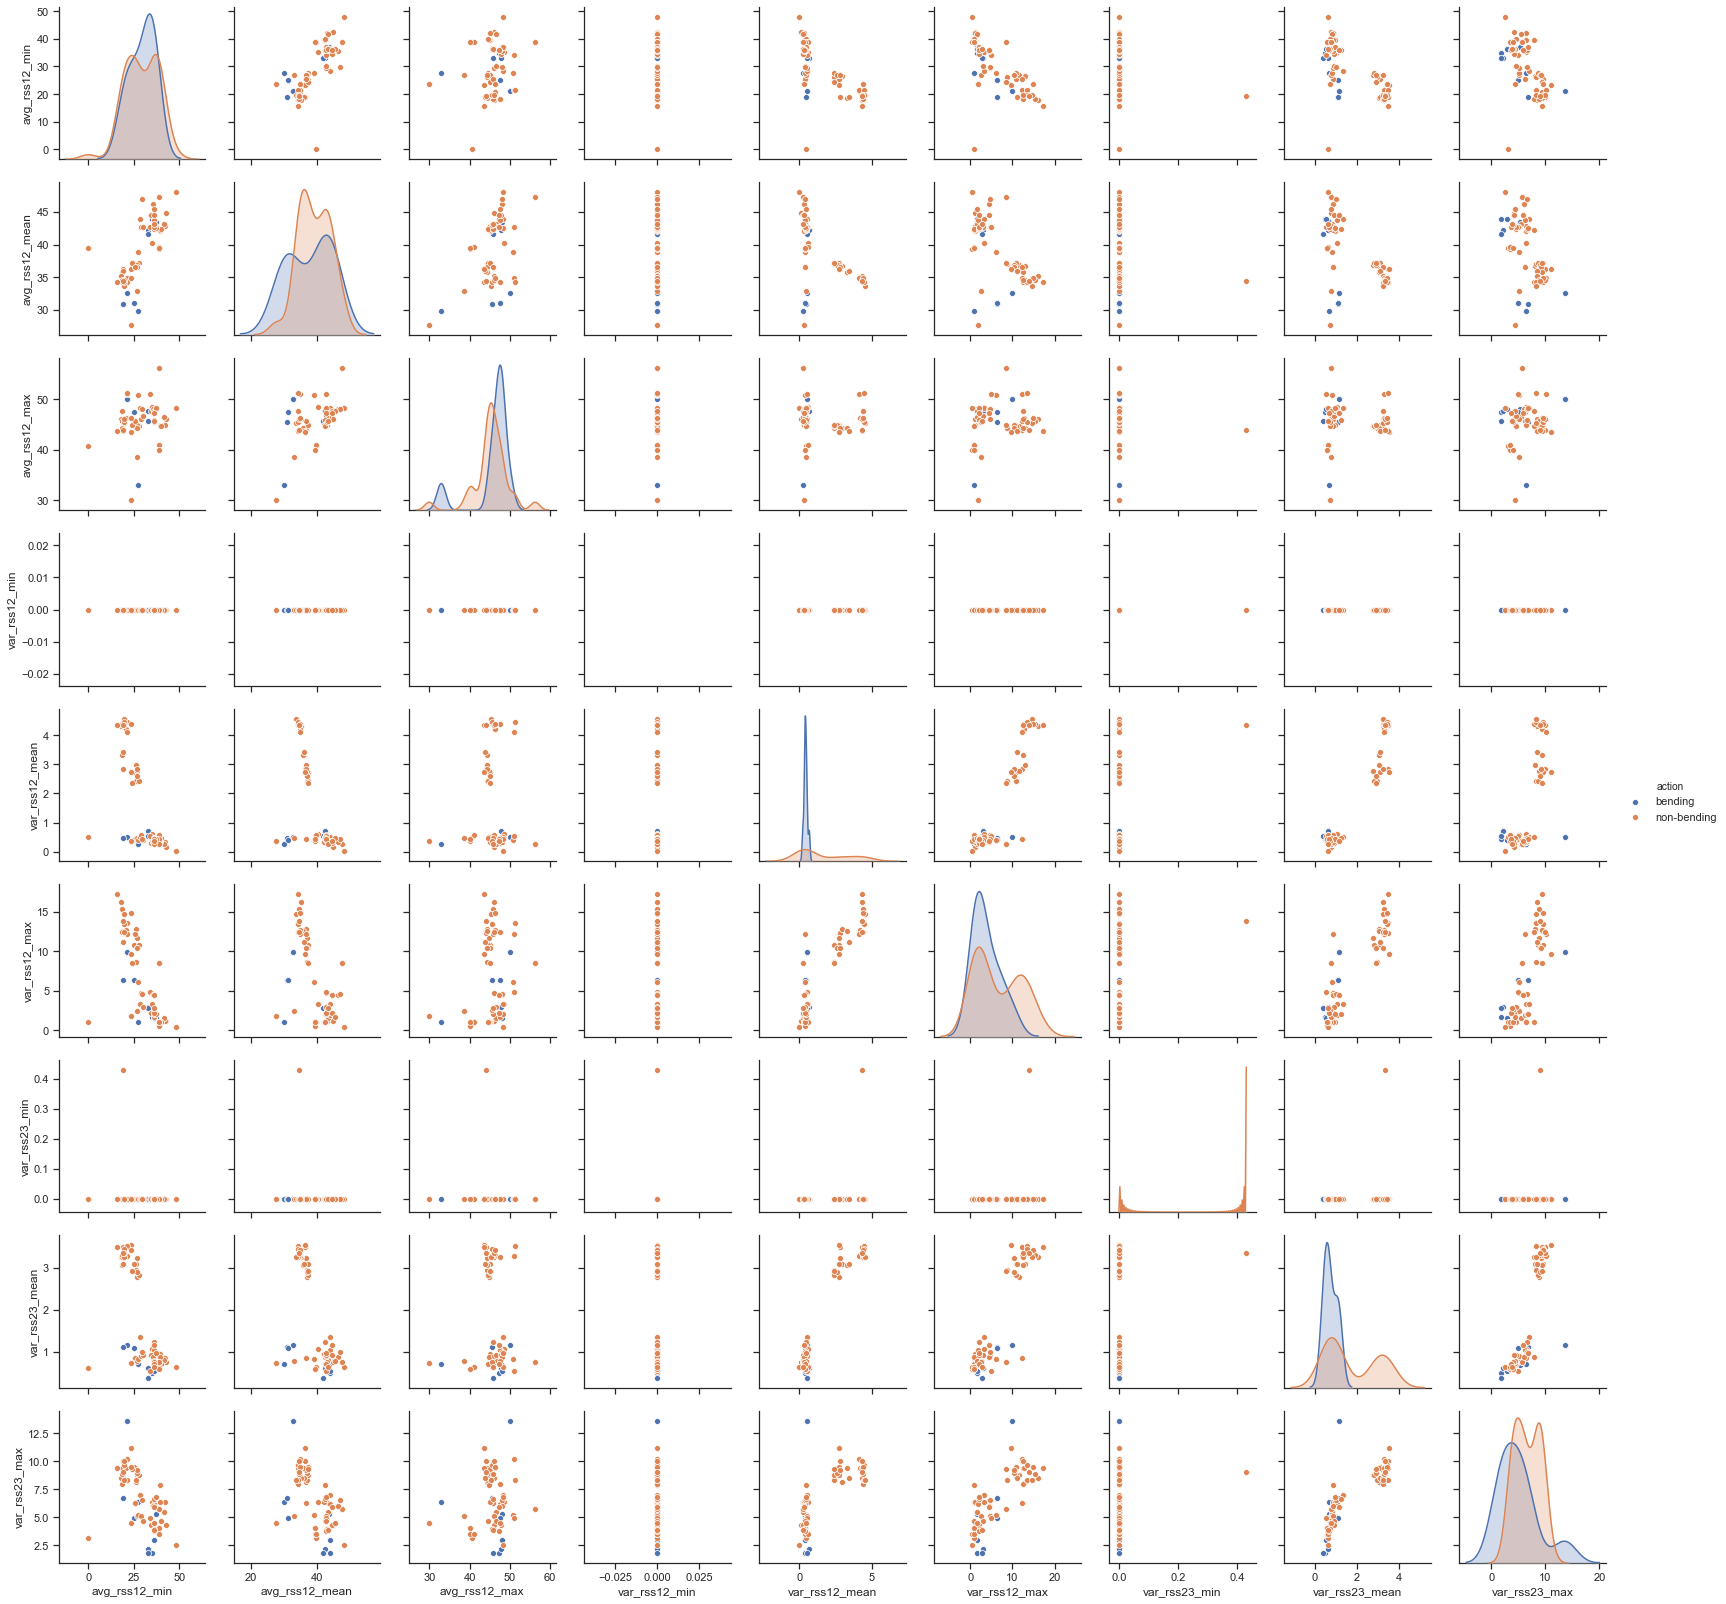

In [18]:
#############################################################
#d.i.  training set with scatter plots in featrue(1,2,6)
#############################################################
import matplotlib.pyplot as plt
import seaborn as sns
import copy

d_train_data = pd.DataFrame()
d_train_data = copy.deepcopy(train_data)

col = [3,4,5]
tmp_headers = ['avg_rss12', 'var_rss12', 'var_rss23']   
tmp_features = ['min','mean','max']

tmp_word_list =['action']
for i in tmp_headers:
    for j in tmp_features:
        word = i+'_'+ j
        tmp_word_list.append(word)
        
#=============data Preprocession==========================
for k in d_train_data:
    for ds in d_train_data[k]:
        tmp_ds = []
        ds.drop(ds.columns[col], axis=1,inplace=True)
        if k == 'bending1' or k == 'bending2':
            ds['action'] = '1'
        else:
            ds['action'] = '0'
# print(d_train_data)
#=============END Preprocession============================

train_feature=[]
for k in d_train_data:                                                  #folder
    for item in d_train_data[k]:                                  #dataset
        tmp_list = []
#         tmp_list.append(k)
        if k == 'bending1' or k == 'bending2':
            tmp_list.append('bending')
        else:
            tmp_list.append('non-bending')
        for h in tmp_headers:                                               #column
#             print(h)
            tmp = item[h].describe()
            tmp_list.extend([tmp[i] for i in tmp_features])
        train_feature.append(tmp_list)
        
print(len(train_feature), len(train_feature[0]))
feature_df = pd.DataFrame(train_feature, columns = tmp_word_list)

#================pic ================================
g = sns.pairplot(feature_df, hue="action",diag_kind="kde")
# g.map(plt.scatter,s=50,alpha=.7,edgecolor="white")

# print(feature_df)
feature_df

    action  min_1  min_2  min_12     mean_1    mean_2   mean_12  max_1  max_2  \
0        1  36.50    0.0    0.00  44.057167  0.381042  0.388333  46.50   1.50   
1        1  33.75    0.0    0.00  43.278875  0.673292  0.586083  47.75   3.00   
2        1  33.00    0.0    0.00  41.621208  0.623083  0.347500  45.75   2.83   
3        1  39.00    0.0    0.00  44.117042  0.250042  0.543875  48.00   1.30   
4        1  36.67    0.0    0.00  43.486208  0.378667  0.585750  45.00   1.30   
29       1  21.00    0.0    0.00  32.014375  0.587875  0.786042  50.00   9.90   
30       1  29.00    0.0    0.00  30.712417  0.298958  0.677917  33.00   1.00   
31       1  19.00    0.0    0.00  29.189875  0.497042  1.114917  39.25   4.33   
32       1  25.00    0.0    0.00  34.110625  0.528500  1.199958  47.50   6.38   
5        0  26.00    0.0    0.00  36.183208  2.753583  3.475333  44.00   9.65   
6        0  28.00    0.0    0.00  36.517542  2.874625  3.008042  43.33  10.85   
7        0  27.80    0.0    

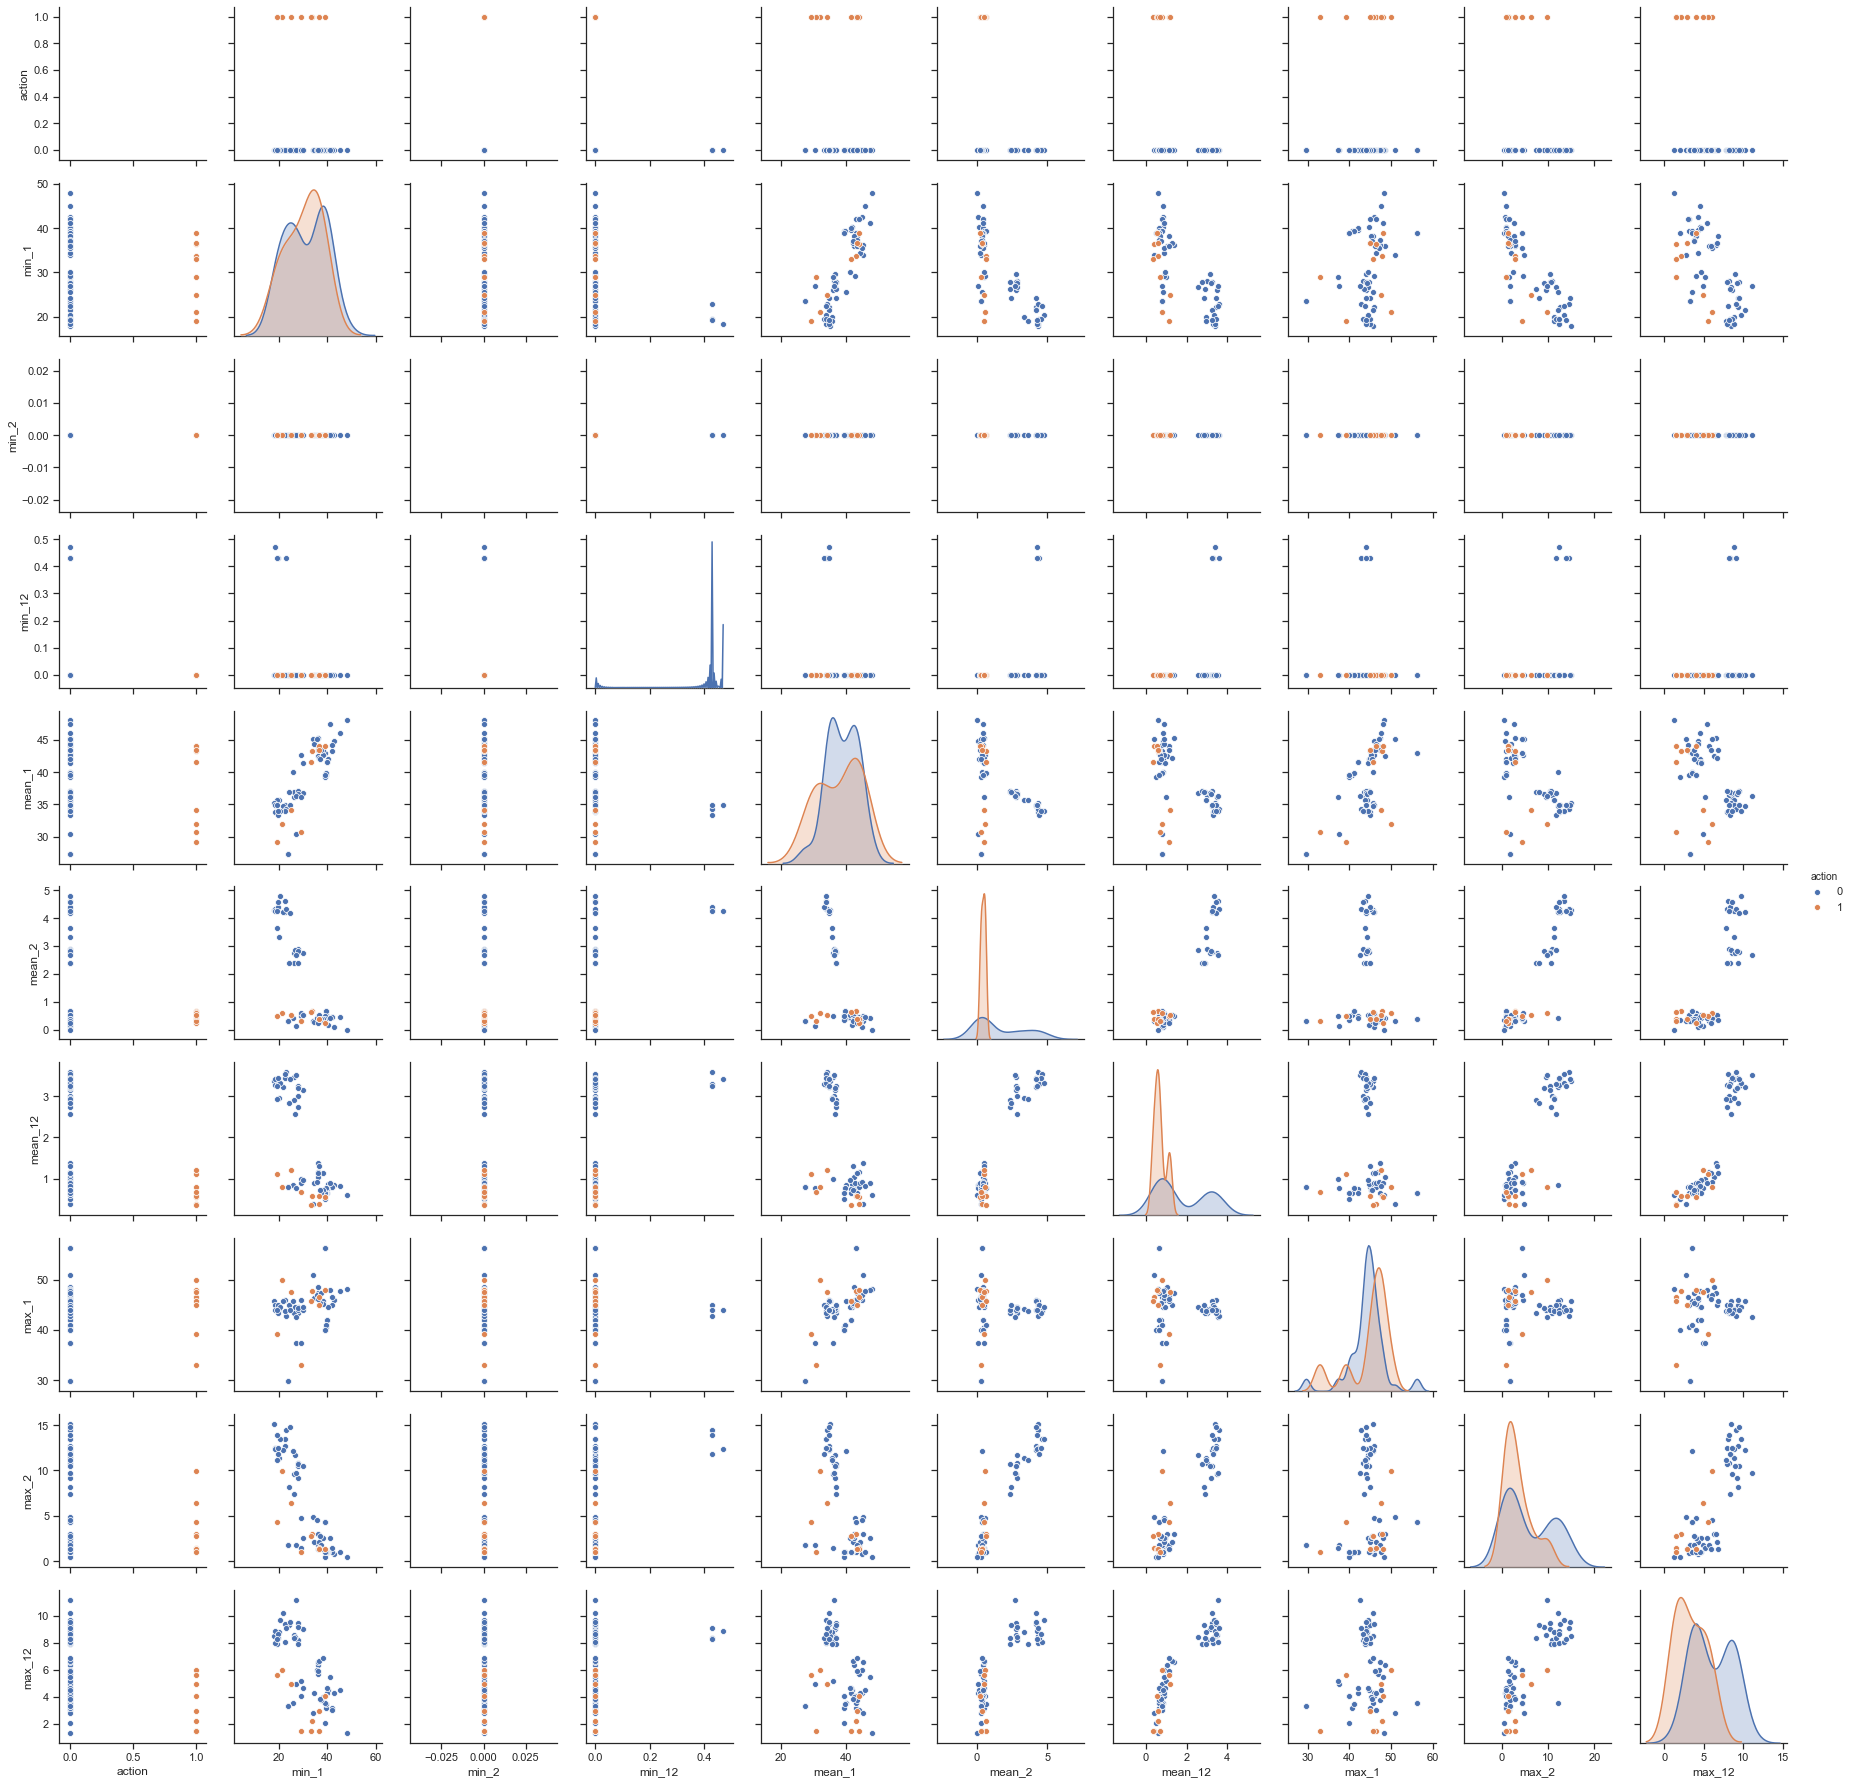

In [20]:
#################################################################
#d.ii. split into 2, 12 time series -> (d)i
#################################################################
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# print(type(train_data))
# print(len(train_data))
train = copy.deepcopy(train_data)

def spliting(data_instance, num=1):
    
    split_instance = {}
    for k in data_instance:                     #folder
        tmp_list = []
        for item in data_instance[k]:     #dataset
            tmp_df = pd.DataFrame()
            
#             print(len_d)
            for i in range(num):
                tmp_l = len(item)//num
                tmp_nd = item[tmp_l*i:tmp_l*(i+1)].drop(columns=['time'])
                for nd in tmp_nd:
#                     print(num, nd, tmp_nd)
                    tmp_df[nd + '_' + str(i)] = tmp_nd[nd].values
            tmp_list.append(tmp_df)
        split_instance[k] = tmp_list
        
    return split_instance

train_times = spliting(train,2)
train_times_fea = extract_features(train_times)
# print(type(train_times_fea))
# print(train_times_fea)
st = ['action','min_1','min_2','min_12', 'mean_1','mean_2','mean_12','max_1','max_2','max_12']

data_dii = train_times_fea.loc[train_times_fea['action'].str.contains('bending'), st]
data_dii.loc[:, 'action'] = 1
data_dii_n = train_times_fea.loc[train_times_fea['action'].str.contains('bending') == False, st]
data_dii_n.loc[:,'action'] = 0
full_dii = pd.concat([data_dii,data_dii_n])

#===========================pic =============================

sns.set(style="ticks",color_codes=True)
sns.pairplot(full_dii, hue="action",diag_kind="kde")

print(full_dii)

### d.ii Ans
As the above plots, I think there maybe a little considerable different in these two results.

1 : 1.0
2 : 1.0
3 : 1.0
4 : 1.0
5 : 1.0
6 : 1.0
7 : 1.0
8 : 1.0
9 : 1.0
10 : 1.0
11 : 1.0
12 : 1.0
13 : 1.0
14 : 1.0
15 : 1.0
16 : 1.0
17 : 1.0
18 : 1.0
19 : 1.0
20 : 1.0
[(1.0, 1, {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}), (1.0, 2, {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}), (1.0, 3, {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001

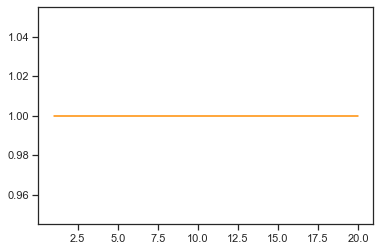

In [1236]:
#############################################################################
#d.iii. split into {1,2,3...20}
#method 1:  P-values
#################################################
from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVR
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

import warnings
warnings.filterwarnings('ignore')

train_d = copy.deepcopy(train_data)
full_score = []
l_num = 21
ls = [i for i in range(1, l_num)]
fts = {l:{} for l in ls}

for l in range(1,21):
    #===============preprocess train data=======================
    ins_t = spliting(train_d, l)                 #data instance
    full_train= extract_features(ins_t)  #dataframe
    len_t_ac = len(full_train['action'])
    
    for i in range(len_t_ac):
        if full_train['action'][i] == 'bending1' or full_train['action'][i] == 'bending2': #label 1,0
            full_train.loc[:,'action'][i] = '1'
        else:
            full_train.loc[:,'action'][i] = '0'

    y_train = full_train['action']
    X_train = full_train.drop(columns='action')
    #===============END =================================
    #===========calcukate p_valles=============================
    scores, p_values = chi2(X_train, y_train) 
    
    tmp_cols = X_train.columns
    tmp_fts = []
    
    P = [i for i in range(1, len(p_values))]
    for p in P:
#         print(p_values[p])
        if p_values[p] <= 0.05:
#             print(p_values[p])
            fts[l][tmp_cols[p]] = p_values[p]
            tmp_fts.append(tmp_cols[p])
#     print(p_values)
    if not tmp_fts:
            continue
    
    X_train_cd = X_train.loc[:, tmp_fts]
    
    # create new model
    model= LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train_cd, y_train)
    tmp_score = model.score(X_train_cd, y_train)
    print(l,':',tmp_score)
    
    #add
    full_score.append((tmp_score, l, model.get_params()))
    
#===================== FOR loop end===================

#result 
print(full_score)

#=================================================
plt.figure()
plt.plot([item[1] for item in full_score], [item[0] for item in full_score], color='darkorange')
plt.show()


In [1230]:
#############################################################
# method 2:  applying recursive feature elimination and 5-fold cross validation
#############################################################
best_features_names_dataframe = {}
train_d = copy.deepcopy(train_data)

model_2_score = []
fts = {l:{} for l in ls}
l_score = {}
score_2 = []
lpss = []
pairs=[]
for l in range(1,21):
    print('===============================================================================')
    #================================preprocession ================================
    ins_t = spliting(train_d, l) #data instance
    full_train= extract_features(ins_t) #dataframe
    len_t_ac = len(full_train['action'])
    
    for i in range(len_t_ac):
        if full_train['action'][i] == 'bending1' or full_train['action'][i] == 'bending2':                #label 1,0
            full_train.loc[:,'action'][i] = '1'
        else:
            full_train.loc[:,'action'][i] = '0'

    y_train = full_train['action']
    X_train = full_train.drop(columns='action')
    names = full_train.columns
    #=============================== END =========================================

    model_ll= LogisticRegression(solver='lbfgs', max_iter=1000)
    rfecv = RFECV(estimator=model_ll, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv.fit(X_train, y_train)
    
#     name=[]
# #     result = rfecv.support_
#     for index, col in enumerate(X_train.columns):
#         if rfecv.support_[index] == True:
#             name.append(col)
#     best_features_names_dataframe[i] = name
#     l_score[i] = rfecv.grid_scores_[rfecv.n_features_-1]
# #     print(type(l_score))
#     print(l_score[i])
    #
    #===================================================
    result = rfecv.support_
    print(result)
    rfecv.ranking_
    print(rfecv.ranking_)
    torf = []
    fts_2=[]
    pair=[]
    for j in range(0,len(result),1):
        if result[j] == True:
            torf = [result[j], names[j]]
            torf.append(torf)
            fts_2.append(names[j])
            pair = [1, len(fts_2)]
    print(fts_2)
    pairs.append(pair)
    X_sld_2 = X_train.loc[:, fts_2]
    mld_2 = LogisticRegression(solver='lbfgs', max_iter=1000)
    mld_2.fit(X_sld_2, y_train)
    tmp_score_2 = mld_2.score(X_sld_2, y_train)
    score_2.append((tmp_score_2, 1))

print(score_2)
print(pairs)
    
#=============================================
# plt.figure()
# plt.plot([item[1] for item in model_2_score],[item[0] for item in model_2_score], color='darkorange')
# plt.xlabel('l')
# plt.ylabel('scores')
# plt.show()

[False False  True False False False  True False  True False False False
 False False  True False False  True False  True False False False False
 False False False False  True  True  True False False  True  True False
 False False False False False False]
[ 9 13  1 12 27 21  1 31  1 15 23 20 25  3  1  5  4  1 29  1  8 32 22 17
 14 28 18 10  1  1  1  2 26  1  1 30  6 11 16 24 19  7]
['max_1', '1st_quart_1', 'min_2', '3rd_quart_2', 'mean_3', 'std_3', '3rd_quart_4', 'min_5', 'max_5', 'std_5', '1st_quart_5']
[False False False  True False False False False  True False False False
 False False False False False False False  True False False False False
 False False False False  True  True  True  True False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False Fa

## d.iii 
#### Ans:
I think, for regular k-fold CV, each fold is drawn randomly from the training set; for stratified k-fold CV, each fold is drawn according to the proportion of categories.  Stratified cross validation is superior to the general cross validation because test set can fully represent the overall data. Additionally, the variance of the k predicted results from CV will also decrease, making CV error more reliable. 

As above shown, in my opinion, the right way in (d.iii) is stratified k-fold cross validation.  However, when P-values are larger than 0.05, I think that using cross validation maybe thinkable. When p is bigger than n, using backward selection maybe no suitable. 


      action  min_1  max_1     mean_1  median_1     std_1  1st_quart_1  \
0   bending1  35.00  47.40  43.954500    44.330  1.558835      43.0000   
1   bending1  33.00  47.75  42.179813    43.500  3.670666      39.1500   
2   bending1  33.00  45.75  41.678063    41.750  2.243490      41.3300   
3   bending1  37.00  48.00  43.454958    43.250  1.386098      42.5000   
4   bending1  36.25  48.00  43.969125    44.500  1.618364      43.3100   
5    cycling  19.00  44.00  36.228396    36.000  3.528617      34.0000   
6    cycling  26.50  44.33  36.687292    36.000  3.529404      34.2500   
7    cycling  25.33  45.00  37.114312    36.250  3.710385      34.5000   
8    cycling  26.75  44.75  36.863375    36.330  3.555787      34.5000   
9    cycling  26.25  44.25  36.957458    36.290  3.434863      34.5000   
10   cycling  27.75  44.67  37.144833    36.330  3.758904      34.0000   
11   cycling  27.00  45.00  36.819521    36.000  3.900459      33.7500   
12   cycling  27.00  44.33  36.541667 

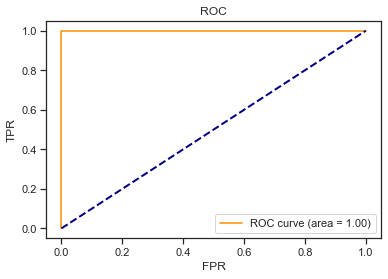

## confusion matrix:
[[60  0]
 [ 0  9]]


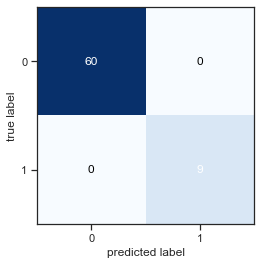

In [1237]:
###############################################################
#d. iv Confusion Matrix, ROC, AUC 
###############################################################
# from ggplot import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,  confusion_matrix
import matplotlib.pyplot as plt 

# model_ll= LogisticRegression(solver='lbfgs', max_iter=1000)
# model_ll.fit(X_train, y_train)
max_l_pvs = max(full_score, key=lambda x:x[0])[1]

train_d = copy.deepcopy(train_data)
# print(train_d)
ins_t = spliting(train_d, max_l_pvs)  #data instance
full_train= extract_features(ins_t)    #dataframe
print(full_train)

len_t_ac = len(full_train['action'])
for i in range(len_t_ac):
    if full_train['action'][i] == 'bending1' or full_train['action'][i] == 'bending2':                #label 1,0
        full_train.loc[:,'action'][i] = '1'
    else:
        full_train.loc[:,'action'][i] = '0'

y_train = full_train['action']
X_train = full_train.drop(columns='action')

#==========================================
ft_sld = fts[max_l_pvs]
X_sld = X_train.loc[:, ft_sld]

# print(X_train)
print(X_sld)
#
clf_pvs = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_sld, y_train)
# clf_pvs = LogisticRegression()
# clf_pvs.fit(X_sld, y_train)

y_pred =clf_pvs.predict(X_sld)
y_proba =clf_pvs.predict_proba(X_sld)[:,1]

y = list(map(int, y_train))

print('P_values:', fts[1])

#=============== roc ==========================
fpr, tpr, _ = roc_curve(y, y_proba) #
df_c = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
print(df_c)

#=============== auc ==========================
roc_auc = auc(fpr, tpr)
print('## auc:', roc_auc)

#================= plot roc curve==================
plt.figure()
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

#================= confusion matrix===============
print('## confusion matrix:')
print(confusion_matrix(y_pred, y_train))

cm = confusion_matrix(y_pred, y_train)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


#### d-iv. Answer 
#### <center> When l=1, I get the max score.  </center>

|feature|coeficient(ßi)|p-value|
|:--|:--:|--:|
|max_2|0.087696|0.001210|
|mean_2|-0.085023|0.005737|
|median_2|-0.080760|0.010474|
|1st_quart_2|-0.107422|0.012885|
|3rd_quart_2|-0.163520|0.001308|
|max_3|-0.045193|0.002203|
|3rd_quart_3|-0.548263|0.031108|
|median_4|-0.100460|0.024754|
|1st_quart_4|-0.145814|0.041143|
|3rd_quart_4|-0.106139|0.028573|
|min_5|0.591948|0.000000|
|max_5|0.911218|0.000000|
|mean_5|0.195366|0.000000|
|median_5|0.022382|0.000000|
|1st_quart_5|0.029904|0.000000|
|3rd_quart_5|-0.057097|0.000000|
|mean_6|-0.046499|0.025682|
|median_6|-0.055773|0.024645|
|1st_quart_6|-0.048689|0.026025|
|3rd_quart_6|-0.087488|0.010960|

In [1249]:
#####################################################
#d. v. best classfication l in ls, and scores 
######################################################
#tmp_key
best_l = tmp_key[0]
test_ins = copy.deepcopy(test_data)

 #===================== test data============================================
ins_test = spliting(test_ins, 1)
full_test=extract_features(ins_test)

len_ac = len(full_test['action'])
for i in range(len_ac):
    if full_test['action'][i] == 'bending1' or full_test['action'][i] == 'bending2':                #label 1,0
        full_test.loc[:,'action'][i] = '1'
    else:
        full_test.loc[:,'action'][i] = '0' 
# print(full_test) 
print(type(best_column_name))
y_test = full_test['action']

X_test = full_test.loc[:, ft_sld] #!
print(type(X_test))
# y_test = list(map(int, y_test))
print(type(y_test))

#======================= End ====================================

model= LogisticRegression(solver='lbfgs', max_iter=1000)
rfecv = RFECV(estimator=model, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)
# print('train score', rfecv.score(X_train, y_train))

print('test score', clf_pvs.score(X_test, y_test))


<class 'dict_keys'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
test score 0.9473684210526315


#### d-v. Answer
|type|score|
|:---|---:|
|train|1.0|
|cross validation|1.0|
|test|0.9473684210526315|

## d. vi

Yes, my classes look like being well-seperated, which may cause instability in calculating logistic regression parameters while there is less data. 



In [1239]:
############################################################
#d. vii logistic regression model based on case-control sampling and adjusting 
############################################################
from sklearn.utils import resample

'''
sklearn.utils.resample - scikit-learn 0.21.3 documentation
https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
'''

df = X_train
df['bending'] = [1]*9 + [0]*60

df_majority = df[df.bending==0]
df_minority = df[df.bending==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=60,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.bending.value_counts()

# print(df_upsampled)
df_upsampled

,min_1,max_1,mean_1,median_1,std_1,1st_quart_1,3rd_quart_1,min_2,max_2,mean_2,...,1st_quart_5,3rd_quart_5,min_6,max_6,mean_6,median_6,std_6,1st_quart_6,3rd_quart_6,bending
9,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.2500,0.0,8.64,2.420083,...,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300,0
10,27.75,44.67,37.144833,36.33,3.758904,34.0000,40.5000,0.0,10.76,2.419062,...,15.0000,18.7500,0.0,8.75,2.822437,2.590,1.637183,1.5800,3.7400,0
11,27.00,45.00,36.819521,36.00,3.900459,33.7500,40.2500,0.0,10.47,2.600146,...,15.5000,19.2700,0.0,8.99,2.887562,2.525,1.723094,1.5600,3.7700,0
12,27.00,44.33,36.541667,36.00,4.018922,33.2500,39.8125,0.0,10.43,2.847958,...,15.0000,19.5000,0.0,9.18,3.225458,2.870,1.769758,1.8850,4.2625,0
13,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.3300,0.0,12.60,3.328104,...,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600,0
14,19.00,43.75,35.879875,36.00,4.614878,33.0000,39.5000,0.0,11.20,3.414312,...,14.7500,19.6900,0.0,8.50,3.093021,2.930,1.626034,1.8900,4.0600,0
15,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.2500,0.0,9.71,2.736021,...,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175,0
16,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000,0
17,42.50,46.00,44.753958,45.00,0.520309,44.7500,45.0000,0.0,1.12,0.153917,...,17.5000,21.6900,0.0,4.30,0.764083,0.700,0.652091,0.4300,1.0000,0
18,25.50,45.75,36.560063,36.50,5.915081,30.0000,42.5000,0.0,12.19,0.422167,...,15.5000,19.0000,0.0,6.26,0.854833,0.830,0.717603,0.4300,1.1450,0


   fpr  tpr
0  0.0  0.0
1  0.0  1.0
2  1.0  1.0
auc: 1.0


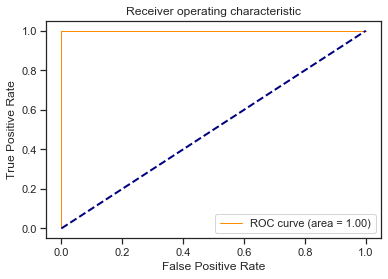

## confusion_matrix: 
[[60  0]
 [ 0 60]]


In [1240]:
#############################################################
# The confusion matrix, ROC, and AUC of the model as per 1(d)(vii)
#############################################################
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

y = df_upsampled.bending
X = df_upsampled.drop('bending', axis=1)
 
# Train model
clf_1 = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
fpr, tpr, thresholds = roc_curve(y, pred_y_1)
df_c = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
print(df_c)
roc_auc = auc(fpr, tpr)
print('auc:', roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#=======================================================
print('## confusion_matrix: ')
cm = confusion_matrix(y, pred_y_1)
print(confusion_matrix(y, pred_y_1))
# fig, ax = plot_confusion_matrix(conf_mat=cm)
# plt.show()


1 0.9855072463768116
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 0.9855072463768116
8 0.9855072463768116
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 0.9855072463768116
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
[(0.9855072463768116, 1), (1.0, 2), (1.0, 3), (1.0, 4), (1.0, 5), (1.0, 6), (0.9855072463768116, 7), (0.9855072463768116, 8), (1.0, 9), (1.0, 10), (1.0, 11), (1.0, 12), (1.0, 13), (0.9855072463768116, 14), (1.0, 15), (1.0, 16), (1.0, 17), (1.0, 18), (1.0, 19), (1.0, 20)]
max pair (1.0, 2)


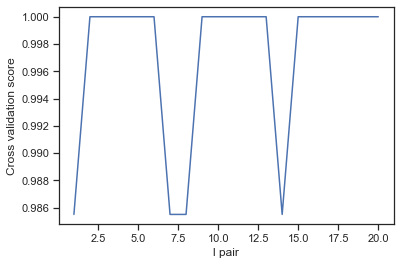

In [22]:
#####################################################
#e.i  Binary Classification using L-1 penalized logistic regression
######################################################
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

train_d = copy.deepcopy(train_data)
ls = [i for i in range(1,21,1)]
l_score = []

for l in ls:
    #=====================train data===============================
    ins_t = spliting(train_d, l) #data instance
    full_train= extract_features(ins_t) #dataframe
    len_t_ac = len(full_train['action'])
    # print(fea_t)
    for i in range(len_t_ac):
        if full_train['action'][i] == 'bending1' or full_train['action'][i] == 'bending2':                
            full_train.loc[:,'action'][i] = '1'
        else:
            full_train.loc[:,'action'][i] = '0'

    y_train = full_train['action']
    # print(y_train)
    X_train = full_train.drop(columns='action')
    #==================== End ===================================

    tmp_cols = X_train.columns
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_tf = scaler.transform(X_train)
    
    clf = LogisticRegressionCV(cv=StratifiedKFold(n_splits=5), penalty='l1', solver="liblinear",
                              random_state=0,  scoring='accuracy', refit=True)
    clf = clf.fit(X_train_tf, y_train)
    score = clf.score(X_train_tf, y_train)
    print(l, score)
    l_score.append((score,l))
    
#     print(X_train)
print(l_score)

#=====================pic =============================
max_pair = max(l_score, key = lambda x:x[0])
print('max pair', max_pair)
plt.figure()
plt.xlabel('l pair')
plt.ylabel('Cross validation score')
plt.plot([item[1] for item in l_score], [item[0] for item in l_score])
plt.show()

In [23]:
#################################################################
# e-ii. Comparing L1 penalized logistic regression and variable selection using P-values
################################################################
from sklearn.metrics import confusion_matrix, roc_curve, auc

train_d = copy.deepcopy(train_data)
test_d = copy.deepcopy(test_data)

best_l = max_pair[1]
print('best l: ',best_l)

#========================train data=====================
ins_l = spliting(train_d, best_l)
full_train = extract_features(ins_l)
len_t_ac = len(full_train['action'])
#     print(fea_t)
for i in range(len_t_ac):
    if full_train['action'][i] == 'bending1' or full_train['action'][i] == 'bending2':                
        full_train.loc[:,'action'][i] = '1'
    else:
        full_train.loc[:,'action'][i] = '0'
y = full_train['action']
#     print(y_train)
X = full_train.drop(columns='action')
#======================== end ========================

#standardize train data
scaler_train = StandardScaler()
scaler_train.fit(X)
X_trans = scaler_train.transform(X)

#====================================================
#==========================test data=====================

ins_l_test = spliting(test_d, best_l)
full_test = extract_features(ins_l_test)
len_t_ac = len(full_test['action'])
#     print(fea_t)
for i in range(len_t_ac):
    if full_test['action'][i] == 'bending1' or full_test['action'][i] == 'bending2':                #label 1,0
        full_test.loc[:,'action'][i] = '1'
    else:
        full_test.loc[:,'action'][i] = '0'
y_test = full_test['action']
#     print(y_train)
X_test = full_test.drop(columns='action')

#=====================================================

#standardize test data
scaler_train = StandardScaler()
scaler_train.fit(X_test)
X_trans_test = scaler_train.transform(X_test)

#=====================================================

mdl_sld = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=StratifiedKFold(n_splits=5), random_state=0,
                               scoring='accuracy').fit(X_trans, y)
tmp_score = mdl_sld.score(X_trans_test, y_test)
print('L1-penalized logistic regression max score:', tmp_score)


best l:  2
L1-penalized logistic regression max score: 0.9473684210526315


## e-ii. Ans
|type|test score|
|:---|---:|
|L1-penalized logistic regression|0.9473684210526315|
|using p-values for variable selection|0.9473684210526315|

As the above table shows, these two methods look like having similar testing scores; however, p-values is easy to implement .I perfer P-values because the train scores of P-values are 1.0 while the train scores of L1-penalized are between 1.0 and 0.94. And in p-value, it doesn't cross validation.

## f. mutliclasses classifiction

In [25]:
####################################################
#f.i multinomial regression model
####################################################
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn import linear_model

train_f= copy.deepcopy(train_data)
lpss = []
max_scores_mtl = []

def multi_mark_func(_ft, _st=None):
    if _st is None:
        _st = _ft.columns
    
    _ft['action'] = _ft['action'].replace(['bending1', 'bending2'], 'bending')
    _ft_columns = _ft['action'].unique()
#     print(_ft_columns)
    
    _tmp_dts = []
    for i in range(len(_ft_columns)):
#         print(_ft_columns[i])
        _tmp_dt = _ft.loc[_ft['action'] == _ft_columns[i], _st]
        _tmp_dt.loc[:, 'action'] = i
        _tmp_dts.append(_tmp_dt)
        
    _dt_full = pd.concat(_tmp_dts)
    return _dt_full

def preprocess_data_l_ml(_data, l):
    # split into l parts
    _ins_l = spliting(_data, l)
    # extract features
    _ft_l = extract_features(_ins_l)
    #label class
    _dt_full = multi_mark_func(_ft_l)
    
    # train data
    _y = _dt_full['action']
    _X = _dt_full.drop(columns=['action'])
    return _X, _y

for l in range(1,21):
    #====================train data ==========================
#     train_f_raw= spliting(train_f, l)
#     train_f= extract_features(train_f_raw)
#     train_f= multi_mark_func(train_f)
    
#     y_train = train_f['action']
#     X_train = train_f.drop(columns = ['action'])
    #==========================================================
    X_train, y_train = preprocess_data_l_ml(train_f, l)
    tmp_cols = X_train.columns
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    
    slc = LogisticRegressionCV(penalty='l1', solver='saga', cv=StratifiedKFold(n_splits=5), random_state=0,
                               scoring='accuracy', multi_class='multinomial')
    slc.fit(X_train, y_train)
    tmp_score_old = slc.score(X_train, y_train)
    print(l, tmp_score_old)
    
    max_scores_mtl.append((tmp_score_old, l))

#================== for end =====================

print(max_scores_mtl)

1 0.9855072463768116
2 1.0
3 1.0
4 1.0
5 1.0
6 0.9710144927536232
7 1.0
8 0.9855072463768116
9 1.0
10 1.0
11 0.9855072463768116
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 0.9855072463768116
18 1.0
19 1.0
20 1.0
[(0.9855072463768116, 1), (1.0, 2), (1.0, 3), (1.0, 4), (1.0, 5), (0.9710144927536232, 6), (1.0, 7), (0.9855072463768116, 8), (1.0, 9), (1.0, 10), (0.9855072463768116, 11), (1.0, 12), (1.0, 13), (1.0, 14), (1.0, 15), (1.0, 16), (0.9855072463768116, 17), (1.0, 18), (1.0, 19), (1.0, 20)]


max pair (1.0, 2)


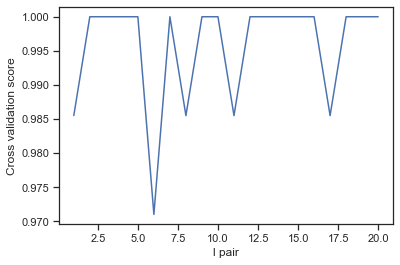

In [27]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


max_pair_mtl = max(max_scores_mtl, key=lambda x: x[0])
print('max pair', max_pair_mtl)
plt.figure()
plt.xlabel('l pair')
plt.ylabel('Cross validation score')
plt.plot([item[1] for item in max_scores_mtl], [item[0] for item in max_scores_mtl])
plt.show() 


In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import copy
#best l
# train_f= copy.deepcopy(train_data)
test_f= copy.deepcopy(test_data)
train_f= copy.deepcopy(train_data)

best_l1 = max_pair_mtl[1]
print(best_l1)

# print(train_f)
X_train, y_train = preprocess_data_l_ml(train_f, best_l1)

# train data
scaler_train = StandardScaler()
scaler_train.fit(X_train)
X_train = scaler_train.transform(X_train)

X_test, y_test = preprocess_data_l_ml(test_f, best_l1)

#test data
scaler_test =  StandardScaler()
scaler_test.fit(X_test)
X_test = scaler_test.transform(X_test)

#=======CV error===================
mdl_sld = LogisticRegressionCV(penalty='l1', solver='saga', cv=StratifiedKFold(n_splits=5), random_state=0,
                               scoring='accuracy', multi_class='multinomial')
mdl_sld.fit(X_train, y_train)

tmp_score = mdl_sld.score(X_test, y_test)
y_test_pred = mdl_sld.predict(X_test)

print(y_test_pred, y_test.values)
print('test error:', (1-tmp_score))

#====== confusion_matrix ===========
confusion_matrix(y_test, y_test_pred)

2
[0 0 0 2 1 1 1 4 2 0 3 3 3 4 4 4 5 5 5] [0 0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5]
test error: 0.1578947368421053


array([[3, 0, 1, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

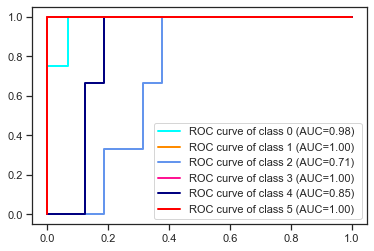

In [29]:
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = 6

fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = mdl_sld.decision_function(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class %d (AUC=%.2f) '
             ''%(i, roc_auc[i]))
plt.legend(loc="lower right")
plt.show()


slc score:  1 0.9710144927536232
slc score:  2 0.9855072463768116
slc score:  3 0.9855072463768116
slc score:  4 1.0
slc score:  5 1.0
slc score:  6 1.0
slc score:  7 0.9565217391304348
slc score:  8 1.0
slc score:  9 1.0
slc score:  10 1.0
slc score:  11 0.9420289855072463
slc score:  12 1.0
slc score:  13 1.0
slc score:  14 1.0
slc score:  15 1.0
slc score:  16 1.0
slc score:  17 1.0
slc score:  18 1.0
slc score:  19 1.0
slc score:  20 1.0
[(0.9855072463768116, 0.37681159420289856, 1), (1.0, 0.3188405797101449, 2), (1.0, 0.30434782608695654, 3), (1.0, 0.30434782608695654, 4), (1.0, 0.3188405797101449, 5), (1.0, 0.2898550724637681, 6), (0.9710144927536232, 0.18840579710144928, 7), (0.9855072463768116, 0.2898550724637681, 8), (1.0, 0.2898550724637681, 9), (1.0, 0.2898550724637681, 10), (0.9565217391304348, 0.18840579710144928, 11), (1.0, 0.2898550724637681, 12), (1.0, 0.2898550724637681, 13), (1.0, 0.2898550724637681, 14), (1.0, 0.2898550724637681, 15), (1.0, 0.2898550724637681, 16), (

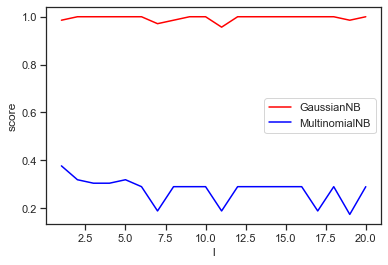

In [1279]:
####################################################
#f.ii Gaussian Naive Baye's classifier for multiclassification
####################################################
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import Normalizer
import numpy as np

train_fii = copy.deepcopy(train_data)
full_score = []
for l in range(1,21):
#     ins_t = spliting(train_d, l) #data instance
#     full_train= extract_features(ins_t) #dataframe
#     len_t_ac = len(full_train['action'])
# #     print(fea_t)
#     for i in range(len_t_ac):
#         if full_train['action'][i] == 'bending1' or full_train['action'][i] == 'bending2':                #label 1,0
#             full_train.loc[:,'action'][i] = '1'
#         else:
#             full_train.loc[:,'action'][i] = '0'

#     y_train = full_train['action']
# #     print(y_train)
#     X_train = full_train.drop(columns='action')

#     train_fii= spliting(train_fii, l)
#     train_fii= extract_features(train_fii)
#     train_fii= multi_mark_func(train_fii)

#     y_train = train_fii['action']
#     X_train = train_fii.drop(columns = ['action'])

    X_train, y_train = preprocess_data_l_ml(train_fii, l)
    
    scaler = Normalizer()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    
    slc = LogisticRegressionCV(penalty='l1', solver='saga', cv=StratifiedKFold(n_splits=5), random_state=0,
                            scoring='accuracy', multi_class='multinomial')
    slc.fit(X_train, y_train)
    tmp_score_slc = slc.score(X_train, y_train)
    print('slc score: ',l, tmp_score_slc)
    
    sel_ = SelectFromModel(slc, prefit=True)
    X_train_new = sel_.transform(X_train)
    #==========================================
    clf = GaussianNB()
    clf.fit(X_train_new, y_train)
    
    tmp_score_clf = clf.score(X_train_new, y_train)
    #==========================================
    clf_mlt = MultinomialNB()
    clf_mlt.fit(X_train_new, y_train)
    
    tmp_score_clf_mlt = clf_mlt.score(X_train_new, y_train)
    full_score.append((tmp_score_clf, tmp_score_clf_mlt, l))
    
print(full_score)
plt.figure()
plt.xlabel('l')
plt.ylabel('score')
plt.plot([item[2] for item in full_score], [item[0] for item in full_score], color='red', label='GaussianNB')
plt.plot([item[2] for item in full_score], [item[1] for item in full_score], color='blue', label='MultinomialNB')
plt.legend()
plt.show()

## f.iii Ans: 
As the above scores figure, I think Gausian Naive Bayes Classifiermodel seems better than Multinomial Naive Baye's classifier. 


# --- Code End

## ISLR 3.7.4:
### Question:
I collect a set of data <B>(n = 100 observations)</B> containing <B>a single predictor</B> and <B>a quantitative response</B>. I then fit a <B>linear regression model</B> to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + ε.

a) Suppose that the <B>true relationship</B> between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(b) Answer (a) using test rather than training RSS.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(d) Answer (c) using test rather than training RSS.

### Ans:
#### a) 
Without knowing more details about the training data, it is difficult to know which training has a lower RSS between linear and cubic.However, since the true relationship between X and Y is linear, we might expect the least square line to be close to the true regression line, so the relative supersaturation of a linear regression might be lower than that of a cubic regression

#### b) 
In this case, test RSS relies on test data, so we don't have enough information to draw conclusions.However, we can assume that polynomial regression will have a higher test RSS because the training of superfitting will have more errors than linear regression.

#### c) 
Polynomial regression has a lower train RSS than linear fitting because it is more flexible: whatever the underlying true relationship store, a more flexible model will be closer to the tracking point and reduce train RSS.

#### d)
There is not enough information to determine which test has lower RSS.If it is more linear than the RSS of the cubic regression tests, the RSS of the linear regression test may be lower than the RSS of the cubic regression tests. Alternatively, if the RSS of the three regression tests is closer to the RSS of the linear regression tests, the RSS of the three regression tests may be lower than the RSS of the linear regression tests. This is due to the bias variance tradeoff: it is not clear which flexibility level of data is better.


## ISLR  4.7.3
### Question: 
This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-specific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature. Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). <B>Prove that in this case, the Bayes’ classifier is not linear.</B> Argue that it is in fact quadratic.

Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ21 = . . . = σK2 .

### Ans:
see Peiying Lyu_ISLR_hw3.pdf

## ISLR 4.7.7
### Question: 
Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was ˆσ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year. 

Hint: Recall that the density function for a normal random variable is f(x) = √ 1 2πσ2 e−(x−μ)2/2σ2. You will need to use <B>.Bayes’ theorem</B>.

### Ans:
see Peiying Lyu_ISLR_hw3.pdf

# ---End